🏆 Mejores configuraciones:
   trial_number         value
0            46  4.021333e+08
1            18  4.005333e+08
2            25  4.000000e+08
3            44  3.997333e+08
4            19  3.994667e+08

📊 Resumen estadístico:
count    4.800000e+01
mean     3.939944e+08
std      4.534164e+06
min      3.818667e+08
25%      3.916667e+08
50%      3.950667e+08
75%      3.968000e+08
max      4.021333e+08
Name: value, dtype: float64


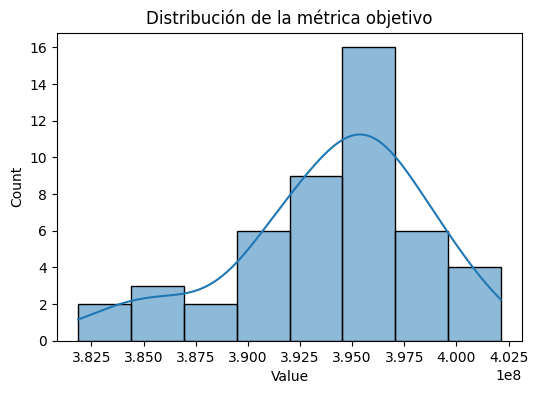

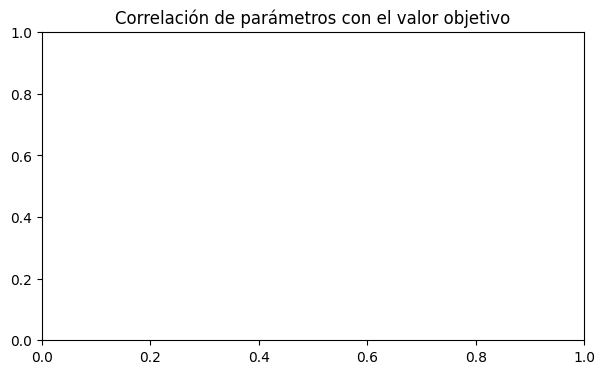


🥇 Mejor configuración encontrada:
  value: 402133333.33333

💾 Resultados exportados:
 - resultados_bayesiana_completo.csv
 - mejores_10_configuraciones.csv
 - correlacion_parametros.csv


In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Cargar el JSON ===
with open("Modelo Final US 0.03 20 Semillas - Uso Meses Corridos - Optimizacion_iteraciones.json", "r") as f:
    data = json.load(f)

# === 2. Convertir a DataFrame plano ===
df = pd.json_normalize(data)

# Extraer parámetros
param_cols = [col for col in df.columns if col.startswith("params.")]
df["value"] = df["ganancia"].astype(float)

# === 3. Ordenar por valor (ajusta ascending según tu objetivo) ===
# Si estás minimizando (por ejemplo RMSE, MSE):
df_sorted = df.sort_values("value", ascending=False).reset_index(drop=True)
# Si estás maximizando, usá ascending=False

# === 4. Mostrar los mejores resultados ===
print("🏆 Mejores configuraciones:")
print(df_sorted[["trial_number", "value"] + param_cols].head())

# === 5. Estadísticas generales ===
print("\n📊 Resumen estadístico:")
print(df["value"].describe())

# === 6. Visualizaciones ===

# Distribución de valores
plt.figure(figsize=(6,4))
sns.histplot(df["value"], kde=True)
plt.title("Distribución de la métrica objetivo")
plt.xlabel("Value")
plt.show()

# Correlación entre parámetros y valor
corrs = {}
for p in param_cols:
    corrs[p.replace("params.", "")] = df[p].corr(df["value"])

corrs_df = pd.DataFrame.from_dict(corrs, orient="index", columns=["correlación con value"])
corrs_df = corrs_df.sort_values("correlación con value")

plt.figure(figsize=(7,4))
sns.barplot(x="correlación con value", y=corrs_df.index, data=corrs_df)
plt.title("Correlación de parámetros con el valor objetivo")
plt.show()

# # Evolución temporal del valor
# # df["datetime"] = pd.to_datetime(df["datetime"])
# plt.figure(figsize=(6,4))
# plt.plot(df["datetime"], df["value"], marker='o')
# plt.title("Evolución del valor a lo largo del tiempo")
# plt.xlabel("Tiempo")
# plt.ylabel("Value")
# plt.show()

# === 7. Mostrar la mejor configuración ===
best = df_sorted.iloc[0]
print("\n🥇 Mejor configuración encontrada:")
for p in param_cols:
    print(f"  {p.replace('params.', '')}: {best[p]}")
print(f"  value: {best['value']:.5f}")

# === 8. Exportar resultados a CSV ===
df.to_csv("resultados_bayesiana_completo.csv", index=False)
df_sorted.head(10).to_csv("mejores_10_configuraciones.csv", index=False)
corrs_df.to_csv("correlacion_parametros.csv")

print("\n💾 Resultados exportados:")
print(" - resultados_bayesiana_completo.csv")
print(" - mejores_10_configuraciones.csv")
print(" - correlacion_parametros.csv")


In [ ]:
print(df)